In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/ai4i2020.csv")

In [ ]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
df[df["Machine failure"]==1]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0


In [ ]:
# Creating new feature: temperature difference between process and air
df['temperature_difference']=df['Process temperature [K]']-df['Air temperature [K]']

In [ ]:
# Creating new feature: mechanical power using torque and rotational speed
df['Mechanical Power [W]']=np.round((df['Torque [Nm]']*df['Rotational speed [rpm]']* 2 * np.pi) / 60,4)

In [ ]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,temperature_difference,Mechanical Power [W]
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,6951.5906
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,6826.7227
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,7749.3875
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,5927.5047
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,5897.8166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,9.6,4955.1294
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,9.5,5434.7040
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,9.6,5753.6175
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,9.7,7151.1026


In [ ]:
df.drop(columns=['TWF','HDF','PWF','OSF','RNF'],inplace=True)

In [ ]:
df.sample(3)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,temperature_difference,Mechanical Power [W]
4688,4689,L51868,L,303.5,311.6,1577,38.1,112,0,8.1,6291.9504
3056,3057,L50236,L,300.2,309.2,1667,29.9,75,0,9.0,5219.5782
1019,1020,L48199,L,296.3,307.3,1398,52.7,31,0,11.0,7715.1861


In [ ]:
df.drop(columns=['UDI','Product ID'],inplace=True)
df.sample(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,temperature_difference,Mechanical Power [W]
6722,L,301.4,310.7,1657,28.7,108,0,9.3,4980.0422
1873,L,298.4,308.1,1367,57.8,92,0,9.7,8274.1801
2388,M,299.2,308.5,1526,37.3,135,0,9.3,5960.6275


In [ ]:
# Label encoding categorical variables (column- Type)
from sklearn.preprocessing import LabelEncoder
df['Type'] = LabelEncoder().fit_transform(df['Type'])

In [ ]:
# Scaling numerical features using StandardScaler for model compatibility
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data=pd.DataFrame(scale.fit_transform(df),columns=df.columns,index=df.index)

In [ ]:
data.sample(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,temperature_difference,Mechanical Power [W]
2400,-1.998335,-0.402433,-0.947360,-0.428259,1.506063,0.864857,-0.187322,-0.600004,2.005659
3231,-0.332223,0.347507,-0.475554,-0.634645,0.532991,-0.124916,-0.187322,-1.399170,0.449871
3882,-0.332223,1.247436,1.074667,-0.668113,0.372485,-1.083267,-0.187322,-0.899691,0.200455
2087,-0.332223,-0.252445,-0.475554,0.213214,-0.339763,-1.476034,-0.187322,-0.200421,-0.220645
9238,1.333889,-0.902393,-0.812558,-0.461727,0.121693,0.660618,-0.187322,0.598745,0.001967
4920,-0.332223,1.697400,1.479072,-1.125511,2.950623,-0.879028,5.338401,-1.199378,3.220052
6843,-0.332223,0.647484,0.872464,-0.166092,0.252105,1.650391,-0.187322,-0.000629,0.408665
8067,1.333889,0.297511,1.344270,-0.272074,-0.018750,-0.219180,-0.187322,1.397911,-0.065258
61,1.333889,-0.602417,-0.677756,0.296884,-0.179257,0.959121,-0.187322,0.199162,0.083124
9538,-0.332223,-0.352437,0.400658,-0.327854,0.512928,-0.014941,-0.187322,1.298015,0.665273


In [ ]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,temperature_difference,Mechanical Power [W]
0,2,298.1,308.6,1551,42.8,0,0,10.5,6951.5906
1,1,298.2,308.7,1408,46.3,3,0,10.5,6826.7227
2,1,298.1,308.5,1498,49.4,5,0,10.4,7749.3875
3,1,298.2,308.6,1433,39.5,7,0,10.4,5927.5047
4,1,298.2,308.7,1408,40.0,9,0,10.5,5897.8166


In [ ]:
Y=df.pop("Machine failure")
X=df

In [ ]:
# print distribution of class before SMOTE
from collections import Counter

counts = Counter(Y)
print(counts)

Counter({0: 9661, 1: 339})


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [ ]:
# print distribution of class AFTER SMOTE

from collections import Counter

counts = Counter(y_resampled )
print(counts)

Counter({0: 9661, 1: 9661})


In [ ]:
#Performing train-test split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_resampled,y_resampled,test_size=0.1)

In [ ]:
# Importing machine learning models

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Logistic Regression CV': LogisticRegressionCV(),
    'SGD': SGDClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [ ]:
# Creating a function to fit models on our dataset and check which model gives highest accuracy

def evaluate_model(X_train,X_test,Y_train,Y_test):
    result=[]
    for name, model in models.items():
        model.fit(X_train,Y_train)
        y_pred=model.predict(X_test)
        acc=accuracy_score(Y_test,y_pred)
        result.append((name,acc))
    # Sort models by accuracy
    result.sort(key=lambda x: x[1], reverse=True)
    return result

In [ ]:
results = evaluate_model(X_train,X_test,Y_train,Y_test)

print("Model Performance:")
for name, acc in results:
    print(f"{name}: {acc:.6f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Model Performance:
Random Forest: 0.984480
Bagging: 0.978789
Decision Tree: 0.968443
Gradient Boosting: 0.952923
K-Nearest Neighbors: 0.939472
AdaBoost: 0.918262
Logistic Regression CV: 0.875841
Logistic Regression: 0.874806
Support Vector Machine: 0.815830
SGD: 0.696844


In [ ]:
RF=RandomForestClassifier(class_weight='balanced')

In [ ]:
RF.fit(X_train,Y_train)
y_pred=RF.predict(X_test)
acc=accuracy_score(Y_test,y_pred)

In [ ]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
acc

0.983445421624418

In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay,
    precision_recall_curve,
    PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Classification Report
    print(f"--------- {model_name} Classification Report ------ \n\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # ROC Curve
    roc_auc = roc_auc_score(y_test, y_prob)
    RocCurveDisplay.from_predictions(y_test, y_prob)
    plt.title(f"{model_name} - ROC Curve (AUC = {roc_auc:.2f})")
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    PrecisionRecallDisplay(precision=precision, recall=recall).plot()
    plt.title(f"{model_name} - Precision-Recall Curve")
    plt.show()

--------- Random Forest Classification Report ------ 


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       992
           1       0.98      0.99      0.98       941

    accuracy                           0.98      1933
   macro avg       0.98      0.98      0.98      1933
weighted avg       0.98      0.98      0.98      1933



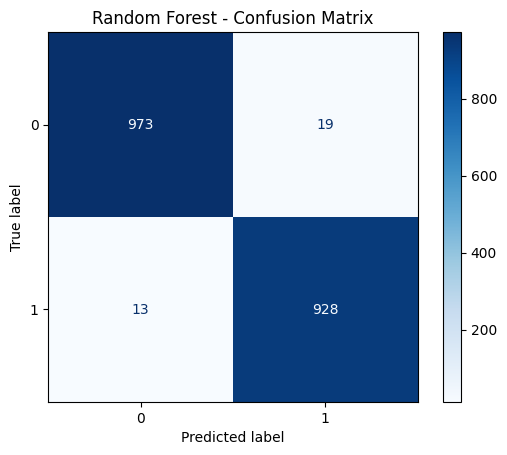

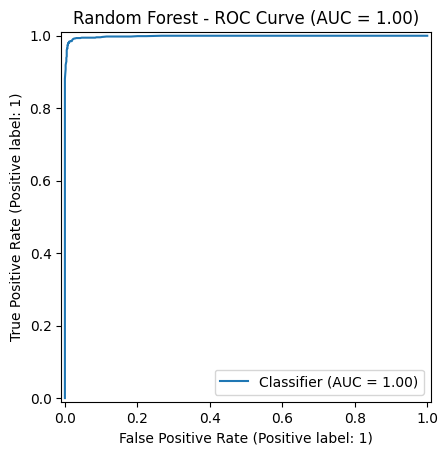

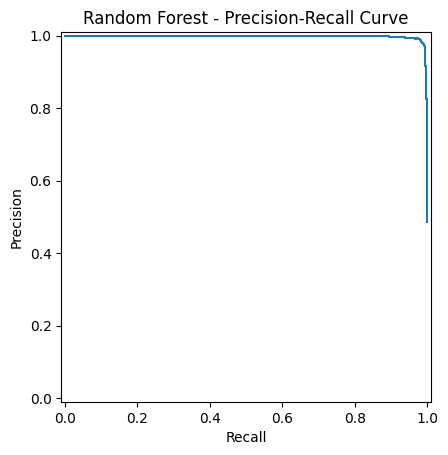

In [ ]:
evaluate_model(RF, X_test, Y_test, model_name="Random Forest")


In [ ]:

# Predict probabilities
y_probs = RF.predict_proba(X_test)[:, 1]  # probability of failure

In [ ]:
for i in y_probs:
  if i<0.5 and i> 0.1:
    print(i)

0.2
0.35
0.12
0.11
0.46
0.12
0.14
0.17
0.12
0.18
0.12
0.12
0.42
0.18
0.2
0.34
0.11
0.19
0.31
0.14
0.14
0.22
0.44
0.19
0.11
0.25
0.33
0.45
0.12
0.17
0.37
0.13
0.34
0.11
0.32
0.12
0.39
0.35
0.45
0.14
0.12
0.35
0.17
0.38
0.46
0.23
0.17
0.46
0.39
0.12
0.23
0.22
0.32
0.16
0.35
0.14
0.15
0.23
0.28
0.25
0.15
0.3
0.2
0.48
0.48
0.12
0.2
0.32
0.35
0.21
0.15
0.48
0.22
0.24
0.11
0.18
0.15
0.33
0.15
0.2
0.14
0.15
0.22
0.15
0.32
0.46
0.19
0.42
0.38
0.38
0.14
0.25
0.2
0.15
0.12
0.11
0.19
0.23
0.11
0.3
0.33
0.23
0.16
0.15
0.11
0.42
0.38
0.22
0.24
0.31
0.25
0.23
0.32
0.3


In [ ]:
import joblib

In [ ]:
joblib.dump(RF, 'model.pkl')
joblib.dump(scale, 'scaler.pkl')

NameError: name 'label_encoder' is not defined

In [ ]:
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])  # Fit here

joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

In [ ]:
import numpy as np
import pandas as pd
import joblib

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load pre-fitted objects (assumes you've saved them already)
model = joblib.load('model.pkl')                 # Your trained model
scaler = joblib.load('scaler.pkl')               # Your fitted StandardScaler
label_encoder = joblib.load('label_encoder.pkl') # Your fitted LabelEncoder

In [ ]:
def predict_failure(input_data):
    """
    input_data: dict or DataFrame with keys/columns as:
    ['Type', 'Air temperature [K]', 'Process temperature [K]',
     'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

    Returns:
        probability of machine failure
    """
    if isinstance(input_data, dict):
        input_df = pd.DataFrame([input_data])
    else:
        input_df = input_data.copy()

    # Feature Engineering
    input_df['temperature_difference'] = input_df['Process temperature [K]'] - input_df['Air temperature [K]']
    input_df['Mechanical Power [W]'] = np.round(
        (input_df['Torque [Nm]'] * input_df['Rotational speed [rpm]'] * 2 * np.pi) / 60, 4)

    # Encode 'Type'
    # input_df['Type'] = label_encoder.transform(input_df['Type'])

    # Ensure columns are in the same order as training
    final_cols = [
        'Type', 'Air temperature [K]', 'Process temperature [K]',
        'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
        'temperature_difference', 'Mechanical Power [W]'
    ]
    input_scaled = pd.DataFrame(scaler.transform(input_df[final_cols]), columns=final_cols)

    # Predict probability
    failure_prob = model.predict_proba(input_scaled)

    return failure_prob

In [ ]:
sample_input = {
    "Type": "2",  # Or the original string values seen in training
    "Air temperature [K]": 298.1,
    "Process temperature [K]": 308.6,
    "Rotational speed [rpm]": 2168,
    "Torque [Nm]": 4.6,
    "Tool wear [min]": 143
}

prob = predict_failure(sample_input)
print(f"Predicted failure probability: {prob}")

Predicted failure probability: [[0.19 0.81]]


In [ ]:
# Label encoding categorical variables (column- Type)
from sklearn.preprocessing import LabelEncoder
df['Type'] = LabelEncoder().fit_transform(df['Type'])

In [ ]:
# Split target from features BEFORE scaling
Y = df.pop("Machine failure")
X = df


In [ ]:

# Now scale only features (not Y)
scale = StandardScaler()
X_scaled = pd.DataFrame(scale.fit_transform(X), columns=X.columns)

# Save these objects
joblib.dump(scale, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'feature_names.pkl')

['feature_names.pkl']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, Y)

In [ ]:
# print distribution of class AFTER SMOTE

from collections import Counter

counts = Counter(y_resampled )
print(counts)

Counter({0: 9661, 1: 9661})


In [ ]:
#Performing train-test split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_resampled,y_resampled,test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, Y_train)

# Save model
joblib.dump(RF, 'RF.pkl')

['RF.pkl']

In [ ]:
y_pred=RF.predict(X_test)
acc=accuracy_score(Y_test,y_pred)

In [ ]:
acc

0.983784716232534

In [ ]:
import numpy as np
import pandas as pd
import joblib

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load pre-fitted objects (assumes you've saved them already)
model = joblib.load('RF.pkl')                 # Your trained model
scaler = joblib.load('scaler.pkl')               # Your fitted StandardScaler
label_encoder = joblib.load('label_encoder.pkl') # Your fitted LabelEncoder

In [ ]:
def predict_failure(input_data):
    """
    input_data: dict or DataFrame with keys/columns as:
    ['Type', 'Air temperature [K]', 'Process temperature [K]',
     'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

    Returns:
        probability of machine failure
    """
    if isinstance(input_data, dict):
        input_df = pd.DataFrame([input_data])
    else:
        input_df = input_data.copy()

    # Feature Engineering
    input_df['temperature_difference'] = input_df['Process temperature [K]'] - input_df['Air temperature [K]']
    input_df['Mechanical Power [W]'] = np.round(
        (input_df['Torque [Nm]'] * input_df['Rotational speed [rpm]'] * 2 * np.pi) / 60, 4)

    # Encode 'Type'
    input_df['Type'] = label_encoder.transform(input_df['Type'])

    # Ensure columns are in the same order as training
    final_cols = [
        'Type', 'Air temperature [K]', 'Process temperature [K]',
        'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
        'temperature_difference', 'Mechanical Power [W]'
    ]
    input_scaled = pd.DataFrame(scaler.transform(input_df[final_cols]), columns=final_cols)

    # Predict probability
    failure_prob = model.predict_proba(input_scaled)[:, 1][0]

    return round(failure_prob, 4)

In [ ]:
sample_input = {
    "Type": "2",  # Or the original string values seen in training
    "Air temperature [K]": 300.0,
    "Process temperature [K]": 320.0,
    "Rotational speed [rpm]": 1500,
    "Torque [Nm]": 40.0,
    "Tool wear [min]": 150
}

prob = predict_failure(sample_input)
print(f"Predicted failure probability: {prob}")

## Model 2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset

data = pd.read_csv('/content/ai4i2020.csv')


# 2. Select numerical features
numerical_features = ['air temperature [K]', 'process temperature [K]', 'rotational speed [rpm]', 'torque [Nm]', 'tool wear [min]']
X = data[numerical_features]
y = data['machine failure']

# 3. Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame for splitting
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features)

# 4. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

# Convert to numpy arrays for easier indexing later
X_train_np = X_train.values
X_test_np = X_test.values

# 5. Define the autoencoder model
input_dim = X_train_np.shape[1]
encoding_dim = 3  # Adjust as needed

input_layer = Input(shape=(input_dim,))
encoder = Dense(6, activation='relu')(input_layer)
encoder = Dense(encoding_dim, activation='relu')(encoder)

decoder = Dense(6, activation='relu')(encoder)
decoder = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

# 6. Compile the autoencoder model
optimizer = Adam(learning_rate=0.001)
autoencoder.compile(optimizer=optimizer, loss='mse')

# 7. Train the autoencoder model on normal data
normal_train_data = X_train_np[y_train == 0]
history = autoencoder.fit(normal_train_data, normal_train_data,
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_split=0.1,
                          verbose=0)

# 8. Reconstruct the test data
reconstructed_test_data = autoencoder.predict(X_test_np)

# 9. Calculate the reconstruction error
mse = np.mean(np.square(X_test_np - reconstructed_test_data), axis=1)

# 10. Determine a threshold for anomaly detection
# Use the reconstruction error of the normal training data to set a threshold
reconstructed_normal_train_data = autoencoder.predict(normal_train_data)
mse_normal_train = np.mean(np.square(normal_train_data - reconstructed_normal_train_data), axis=1)
threshold = np.percentile(mse_normal_train, 95) # Adjust percentile as needed

print(f"Anomaly detection threshold: {threshold:.4f}")

# 11. Identify anomalies in the test set
y_pred_anomaly = (mse > threshold).astype(int)

# 12. Evaluate the performance
accuracy = accuracy_score(y_test, y_pred_anomaly)
precision = precision_score(y_test, y_pred_anomaly)
recall = recall_score(y_test, y_pred_anomaly)
f1 = f1_score(y_test, y_pred_anomaly)
conf_matrix = confusion_matrix(y_test, y_pred_anomaly)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Visualize reconstruction error distribution
plt.figure(figsize=(10, 6))
sns.histplot(mse[y_test == 0], bins=50, kde=True, label='Normal')
sns.histplot(mse[y_test == 1], bins=50, kde=True, color='red', label='Failure')
plt.axvline(threshold, color='k', linestyle='dashed', linewidth=1, label=f'Threshold: {threshold:.4f}')
plt.title('Distribution of Reconstruction Error')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Optional: Visualize training history
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
# 1. Load the dataset

data = pd.read_csv('/content/ai4i2020.csv')

In [178]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [179]:
# Creating new feature: temperature difference between process and air
data['temperature_difference']=data['Process temperature [K]']-data['Air temperature [K]']

In [180]:
# Creating new feature: mechanical power using torque and rotational speed
data['Mechanical Power [W]']=np.round((data['Torque [Nm]']*data['Rotational speed [rpm]']* 2 * np.pi) / 60,4)

In [181]:
# Label encoding categorical variables (column- Type)
from sklearn.preprocessing import LabelEncoder
data['Type'] = LabelEncoder().fit_transform(data['Type'])

In [182]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,temperature_difference,Mechanical Power [W]
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,6951.5906
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,6826.7227
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,7749.3875
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,5927.5047
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,5897.8166


In [183]:
# 2. Select numerical features
numerical_features = ['Type','Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','temperature_difference','Mechanical Power [W]']
X = data[numerical_features]
y = data['Machine failure']

In [184]:
# 3. Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame for splitting
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features)

In [185]:
# 4. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

# Convert to numpy arrays
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values
y_test_np = y_test.values

In [186]:
# 5. Apply SMOTE to the training data ONLY
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_np, y_train_np)

print("Shape of training data before SMOTE:", X_train_np.shape)
print("Shape of training data after SMOTE:", X_train_resampled.shape)
print("Number of failures in training data before SMOTE:", np.sum(y_train_np == 1))
print("Number of failures in training data after SMOTE:", np.sum(y_train_resampled == 1))


Shape of training data before SMOTE: (7000, 8)
Shape of training data after SMOTE: (13508, 8)
Number of failures in training data before SMOTE: 246
Number of failures in training data after SMOTE: 6754


In [187]:
# 5. Define the autoencoder model
input_dim = X_train_np.shape[1]
encoding_dim = 3  # Adjust as needed

input_layer = Input(shape=(input_dim,))
encoder = Dense(6, activation='relu')(input_layer)
encoder = Dense(encoding_dim, activation='relu')(encoder)

decoder = Dense(6, activation='relu')(encoder)
decoder = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [188]:
# 6. Compile the autoencoder model
optimizer = Adam(learning_rate=0.001)
autoencoder.compile(optimizer=optimizer, loss='mse')

In [189]:
# 8. Train the autoencoder model on the RESAMPLED normal data
normal_train_resampled_data = X_train_resampled[y_train_resampled == 0]
history = autoencoder.fit(normal_train_resampled_data, normal_train_resampled_data,
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_split=0.1,
                          verbose=0)

In [190]:
# 9. Reconstruct the test data (using the model trained on resampled data)
reconstructed_test_data = autoencoder.predict(X_test_np)

# 10. Calculate the reconstruction error
mse = np.mean(np.square(X_test_np - reconstructed_test_data), axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [194]:
# 11. Determine a threshold for anomaly detection (you might need to re-evaluate this)
# Use the reconstruction error of the normal RESAMPLED training data to set a threshold
reconstructed_normal_train_resampled_data = autoencoder.predict(normal_train_resampled_data)
mse_normal_train_resampled = np.mean(np.square(normal_train_resampled_data - reconstructed_normal_train_resampled_data), axis=1)
threshold = np.percentile(mse_normal_train_resampled, 95) # Adjust percentile as needed

print(f"Anomaly detection threshold (after SMOTE): {threshold:.4f}")

212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Anomaly detection threshold (after SMOTE): 0.5601


In [195]:
# 12. Identify anomalies in the test set
y_pred_anomaly = (mse > threshold).astype(int)

In [196]:
# 13. Evaluate the performance
accuracy = accuracy_score(y_test, y_pred_anomaly)
precision = precision_score(y_test, y_pred_anomaly)
recall = recall_score(y_test, y_pred_anomaly)
f1 = f1_score(y_test, y_pred_anomaly)
conf_matrix = confusion_matrix(y_test, y_pred_anomaly)

print(f"Accuracy (after SMOTE): {accuracy:.4f}")
print(f"Precision (after SMOTE): {precision:.4f}")
print(f"Recall (after SMOTE): {recall:.4f}")
print(f"F1-Score (after SMOTE): {f1:.4f}")
print("Confusion Matrix (after SMOTE):")
print(conf_matrix)

Accuracy (after SMOTE): 0.9253
Precision (after SMOTE): 0.1641
Recall (after SMOTE): 0.3441
F1-Score (after SMOTE): 0.2222
Confusion Matrix (after SMOTE):
[[2744  163]
 [  61   32]]


# Electrical model

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/sensor_maintenance_data.csv')

In [6]:
df.head()

,Sensor_ID,Timestamp,Voltage (V),Current (A),Temperature (°C),Power (W),Humidity (%),Vibration (m/s²),Equipment_ID,Operational Status,...,Ambient Temperature (°C),Ambient Humidity (%),External Factors,X,Y,Z,Equipment Relationship,Equipment Criticality,Fault Detected,Predictive Maintenance Trigger
0,S_1,2024-01-01 00:00:00,110,0.5,20,55.0,40,0.20,E_1,Operational,...,20,40,Clear Weather,0,0,0,Independent,High,1,1
1,S_2,2024-01-01 01:00:00,111,0.6,21,66.6,41,0.25,E_2,Under Maintenance,...,21,41,Storm,1,1,1,Dependent,Medium,0,0
2,S_3,2024-01-01 02:00:00,112,0.7,22,78.4,42,0.30,E_3,Operational,...,22,42,Clear Weather,2,2,2,Dependent,High,0,0
3,S_4,2024-01-01 03:00:00,113,0.8,23,90.4,43,0.35,E_4,Under Maintenance,...,23,43,Storm,3,3,3,Independent,Medium,1,0
4,S_5,2024-01-01 04:00:00,114,0.9,24,102.6,44,0.40,E_5,Operational,...,24,44,Clear Weather,4,4,4,Dependent,High,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Sensor_ID                       500 non-null    object 
 1   Timestamp                       500 non-null    object 
 2   Voltage (V)                     500 non-null    int64  
 3   Current (A)                     500 non-null    float64
 4   Temperature (°C)                500 non-null    int64  
 5   Power (W)                       500 non-null    float64
 6   Humidity (%)                    500 non-null    int64  
 7   Vibration (m/s²)                500 non-null    float64
 8   Equipment_ID                    500 non-null    object 
 9   Operational Status              500 non-null    object 
 10  Fault Status                    500 non-null    object 
 11  Failure Type                    200 non-null    object 
 12  Last Maintenance Date           500 

In [13]:
df = df.drop('Failure Type', axis=1)

In [12]:
df = df.drop('X', axis=1)

In [14]:
df = df.drop('Y', axis=1)

In [15]:
df = df.drop('Z', axis=1)

In [9]:
# Identify categorical and numerical columns
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: ['Sensor_ID', 'Timestamp', 'Equipment_ID', 'Operational Status', 'Fault Status', 'Failure Type', 'Last Maintenance Date', 'Maintenance Type', 'Failure History', 'External Factors', 'Equipment Relationship', 'Equipment Criticality']
Numerical columns: ['Voltage (V)', 'Current (A)', 'Temperature (°C)', 'Power (W)', 'Humidity (%)', 'Vibration (m/s²)', 'Repair Time (hrs)', 'Maintenance Costs (USD)', 'Ambient Temperature (°C)', 'Ambient Humidity (%)', 'X', 'Y', 'Z', 'Fault Detected', 'Predictive Maintenance Trigger']


In [10]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Sensor_ID                           0
Timestamp                           0
Voltage (V)                         0
Current (A)                         0
Temperature (°C)                    0
Power (W)                           0
Humidity (%)                        0
Vibration (m/s²)                    0
Equipment_ID                        0
Operational Status                  0
Fault Status                        0
Failure Type                      300
Last Maintenance Date               0
Maintenance Type                    0
Failure History                     0
Repair Time (hrs)                   0
Maintenance Costs (USD)             0
Ambient Temperature (°C)            0
Ambient Humidity (%)                0
External Factors                    0
X                                   0
Y                                   0
Z                                   0
Equipment Relationship              0
Equipment Criticality               0
Fault Detected    

In [16]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
# ----------------------------------------
# Step 2: Generate Synthetic Data
# ----------------------------------------

def generate_synthetic_data(num_machines=50, max_cycles=200, num_sensors=5):
    """
    Generate synthetic sensor data for multiple machines.

    Each machine runs for a random number of cycles (between 100 and max_cycles).
    Sensor readings start at a baseline and slowly drift as the machine ages.
    """
    data = []
    for machine in range(1, num_machines+1):
        # Each machine can have a different number of cycles
        cycles = np.random.randint(100, max_cycles+1)
        # Baseline sensor readings (constant + random noise for variability)
        baseline = np.random.uniform(0.5, 1.5, size=num_sensors)
        drift = np.linspace(0, 1, cycles)  # degradation factor
        for cycle in range(1, cycles+1):
            # Generate sensor values: baseline + drift + some random noise
            sensors = baseline + (drift[cycle-1]*np.random.uniform(0.5, 1.0, size=num_sensors))
            sensors += np.random.normal(0, 0.05, size=num_sensors)
            data.append([machine, cycle] + sensors.tolist())

    # Create a DataFrame with columns: engine_id, cycle, sensor_1, sensor_2, ..., sensor_n
    columns = ['machine_id', 'cycle'] + [f'sensor_{i}' for i in range(1, num_sensors+1)]
    df = pd.DataFrame(data, columns=columns)

    # Calculate RUL as the maximum cycle for a machine minus the current cycle.
    df['RUL'] = df.groupby('machine_id')['cycle'].transform('max') - df['cycle']
    return df


In [18]:
# Generate synthetic data
num_machines = 50
max_cycles = 200
num_sensors = 5
df = generate_synthetic_data(num_machines=num_machines, max_cycles=max_cycles, num_sensors=num_sensors)

print("Synthetic dataset shape:", df.shape)
print(df.head())


Synthetic dataset shape: (7615, 8)
   machine_id  cycle  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  RUL
0           1      1  1.421670  1.205735  1.070089  0.609814  0.525367  150
1           1      2  1.502537  1.310649  1.091168  0.663702  0.589312  149
2           1      3  1.431318  1.286342  1.123927  0.632044  0.612017  148
3           1      4  1.457578  1.252781  1.019768  0.602197  0.682463  147
4           1      5  1.426521  1.176498  1.163203  0.654376  0.609966  146


In [33]:
df.head(120)

,machine_id,cycle,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,RUL
0,1,1,0.047945,-0.513360,-0.917518,-2.064496,-2.463395,150
1,1,2,0.265682,-0.246741,-0.860743,-1.917909,-2.285853,149
2,1,3,0.073921,-0.308513,-0.772506,-2.004027,-2.222811,148
3,1,4,0.144629,-0.393802,-1.053059,-2.085217,-2.027219,147
4,1,5,0.061006,-0.587662,-0.666715,-1.943279,-2.228507,146
...,...,...,...,...,...,...,...,...
115,1,116,1.887605,0.828051,1.082920,0.085411,-0.575868,35
116,1,117,1.860982,1.504909,0.960245,-0.197230,-0.882435,34
117,1,118,1.721158,1.369248,0.484496,-0.149826,-0.297812,33
118,1,119,1.153314,0.783991,1.226907,-0.530715,-0.385749,32


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7615 entries, 0 to 7614
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   machine_id  7615 non-null   int64  
 1   cycle       7615 non-null   int64  
 2   sensor_1    7615 non-null   float64
 3   sensor_2    7615 non-null   float64
 4   sensor_3    7615 non-null   float64
 5   sensor_4    7615 non-null   float64
 6   sensor_5    7615 non-null   float64
 7   RUL         7615 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 476.1 KB


In [20]:
df["machine_id"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [21]:
# Scale sensor data
sensor_cols = [f'sensor_{i}' for i in range(1, num_sensors+1)]
scaler = StandardScaler()
df[sensor_cols] = scaler.fit_transform(df[sensor_cols])

In [22]:
def create_sequences(df, seq_length=30):
    """
    Create sequences of sensor data and the corresponding RUL targets.
    For each machine, we extract a sliding window of fixed length (seq_length).
    The target is the RUL at the end of the window.
    """
    sequences = []
    targets = []
    machine_ids = df['machine_id'].unique()

    for mid in machine_ids:
        machine_data = df[df['machine_id'] == mid].reset_index(drop=True)
        data_array = machine_data[sensor_cols].values
        rul_array = machine_data['RUL'].values

        if len(machine_data) < seq_length:
            continue  # Skip if there isn't enough data

        for i in range(len(machine_data) - seq_length + 1):
            seq_x = data_array[i:i+seq_length]
            seq_y = rul_array[i+seq_length-1]  # target: RUL at last timestep of the window
            sequences.append(seq_x)
            targets.append(seq_y)

    return np.array(sequences), np.array(targets)

In [23]:
sequence_length = 30
X, y = create_sequences(df, seq_length=sequence_length)
print("Sequences shape:", X.shape)
print("Targets shape:", y.shape)

Sequences shape: (6165, 30, 5)
Targets shape: (6165,)


In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (4932, 30, 5) (4932,)
Testing set: (1233, 30, 5) (1233,)


In [25]:
# Define a simple LSTM model
model = Sequential([
    LSTM(64, input_shape=(sequence_length, len(sensor_cols)), return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Predict single RUL value
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,425 (122.75 KB)

 Trainable params: 31,425 (122.75 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Train the model using early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 5370.8091 - mae: 61.7550 - val_loss: 4049.5320 - val_mae: 51.1370
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 3510.5881 - mae: 47.3033 - val_loss: 2429.8875 - val_mae: 39.3540
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 2118.6357 - mae: 36.8447 - val_loss: 1744.1631 - val_mae: 34.6018
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 1655.7578 - mae: 33.7380 - val_loss: 1650.8915 - val_mae: 34.0978
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 1607.8601 - mae: 33.4945 - val_loss: 1644.9501 - val_mae: 34.0885
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 1604.6376 - mae: 33.4955 - val_loss: 1129.5067 - val_mae: 26.6622
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 1026.4557 - mae: 25.4726 - val_loss: 749.1655 - val_mae: 21.7700
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 687.0378 - mae: 20.4657 - val_loss: 530.0413 - val_mae: 18

In [ ]:
model.

In [27]:
# ----------------------------------------
# Step 5: Evaluate the Model and Visualize Results
# ----------------------------------------

test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test Mean Absolute Error (MAE):", test_mae)

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 7.9493 - mae: 2.2025
Test Mean Absolute Error (MAE): 2.191197156906128


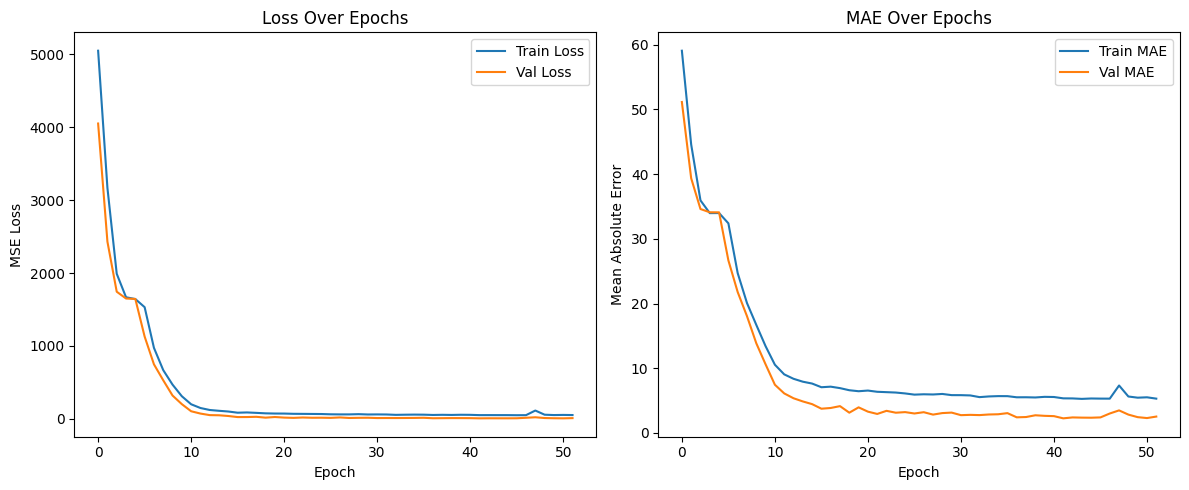

In [28]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Loss Over Epochs")

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.title("MAE Over Epochs")

plt.tight_layout()
plt.show()

In [30]:
df[df['machine_id'] == 1].copy()

,machine_id,cycle,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,RUL
0,1,1,0.047945,-0.513360,-0.917518,-2.064496,-2.463395,150
1,1,2,0.265682,-0.246741,-0.860743,-1.917909,-2.285853,149
2,1,3,0.073921,-0.308513,-0.772506,-2.004027,-2.222811,148
3,1,4,0.144629,-0.393802,-1.053059,-2.085217,-2.027219,147
4,1,5,0.061006,-0.587662,-0.666715,-1.943279,-2.228507,146
...,...,...,...,...,...,...,...,...
146,1,147,1.867011,1.845963,1.448168,0.403944,0.174129,4
147,1,148,2.909447,1.593599,1.674903,-0.240168,0.509970,3
148,1,149,1.755075,1.444018,0.775228,-0.488333,-0.628508,2
149,1,150,1.644237,1.597275,0.986978,0.269553,0.128112,1


In [29]:
# ----------------------------------------
# Step 6: Make a Prediction on Custom Synthetic Data
# ----------------------------------------

def create_sequence_from_custom_data(df, seq_length=30):
    """
    Given sensor data for one machine, extract the latest sequence.
    Returns a numpy array with shape (1, seq_length, num_features)
    """
    if len(df) < seq_length:
        raise ValueError("Not enough data to form a complete sequence.")
    # Use the last seq_length rows
    sequence = df[sensor_cols].values[-seq_length:]
    return np.expand_dims(sequence, axis=0)

# Let's simulate custom data for a machine (e.g., machine_id=1)
custom_data = df[df['machine_id'] == 1].copy()  # using synthetic data; in practice, use your actual sensor data

X_custom = create_sequence_from_custom_data(custom_data, seq_length=sequence_length)
predicted_rul = model.predict(X_custom)
print("Predicted Remaining Useful Life (RUL) for Machine 1:", predicted_rul[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
Predicted Remaining Useful Life (RUL) for Machine 1: 9.342552


In [34]:
import pickle

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [35]:
model_config = {
    'seq_length': 30,
    'sensor_columns': [f'sensor_{i}' for i in range(1, num_sensors+1)]
}

with open('model_config.pkl', 'wb') as f:
    pickle.dump(model_config, f)

In [39]:
model.save('lstm_model.h5')

In [40]:
df.to_csv('synthetic_sensor_data.csv', index=False)


In [41]:
import numpy as np

np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)